In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 

In [3]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from scipy.stats import loguniform
cv = ShuffleSplit(n_splits = 5, test_size=0.3, random_state=0)

In [4]:
train = pd.read_csv("train.csv")

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
train.shape

(614, 13)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [11]:
def missing_values(df):
    return df.isnull().sum()

missing_values(train)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
train.drop('Loan_ID', axis= 1, inplace=True)

In [13]:
train.describe(include=['O']).T

,count,unique,top,freq
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [14]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
train['Loan_Status'] = train['Loan_Status'].map({'Y':1,"N":0})
train = train.replace(to_replace = '3+', value = 4) 

In [16]:
# Dealing with Categorical Data
cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in cols:
    train[i].fillna(train[i].mode().iloc[0], inplace=True)

In [17]:
# Dealing with Numerical Data 
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for i in num_cols:
    train[i].fillna(train[i].mean(axis=0), inplace=True)

In [18]:
missing_values(train)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']


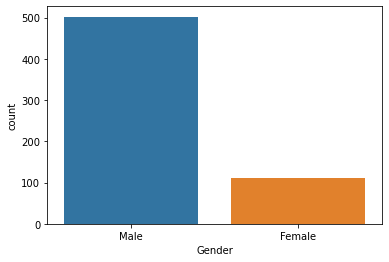

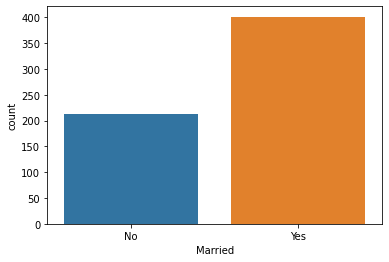

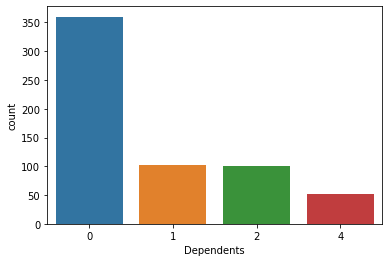

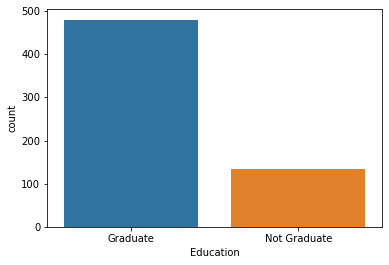

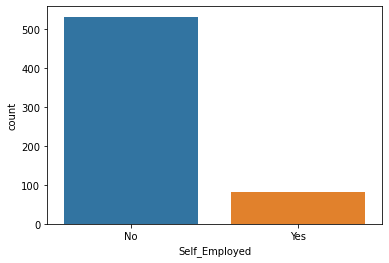

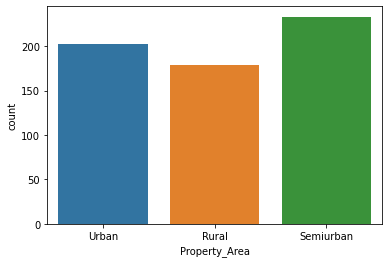

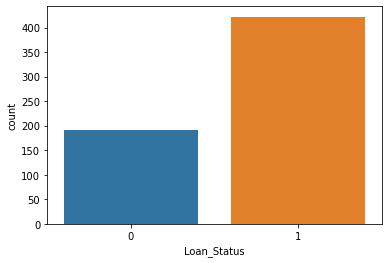

In [20]:
for i in cols:
    plt.figure()
    sns.countplot(train[i])

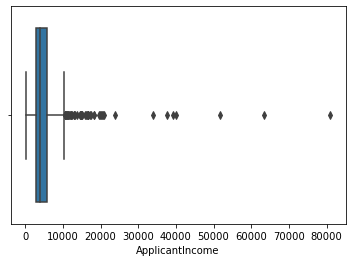

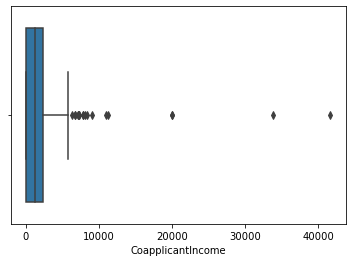

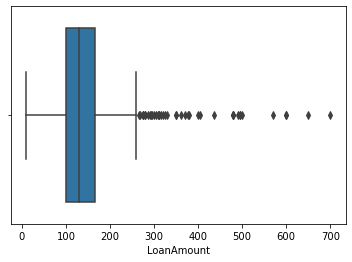

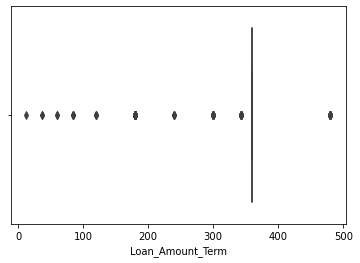

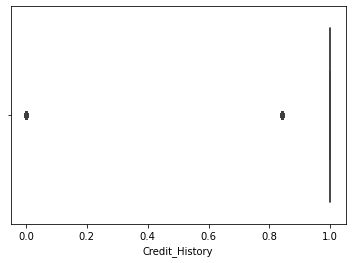

In [21]:
for i in num_cols:
    plt.figure()
    sns.boxplot(train[i])

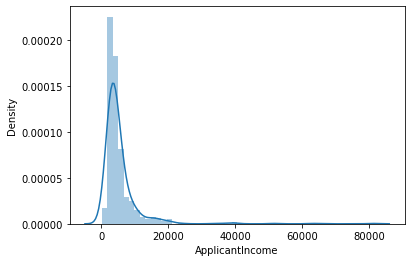

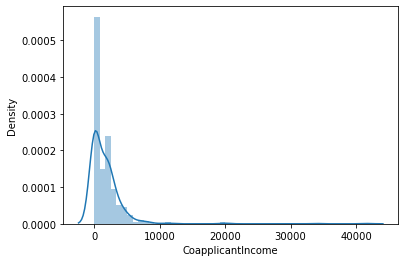

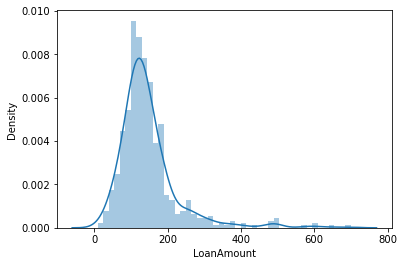

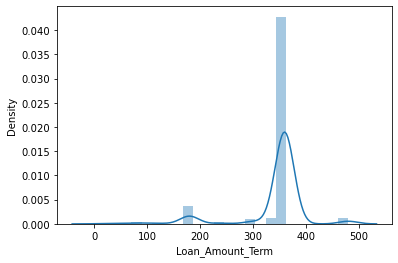

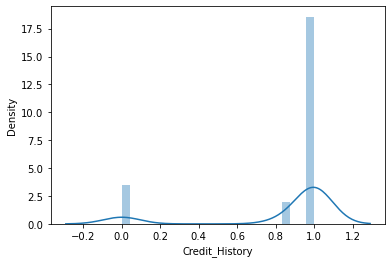

In [22]:
for i in num_cols:
    plt.figure()
    sns.distplot(train[i])

In [23]:
train['ApplicantIncomeLog'] = np.log(train['ApplicantIncome']+1)
train['Loan_Amount_Term_Log'] = np.log(train['Loan_Amount_Term']+1)
train['LoanAmountLog'] = np.log(train['LoanAmount']+1)
train['Total_Income_Log'] = np.log(train['Total_Income']+1)

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

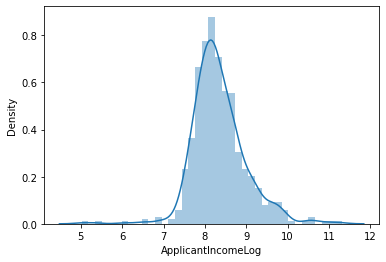

In [24]:
plt.figure()
sns.distplot(train['ApplicantIncomeLog'])

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

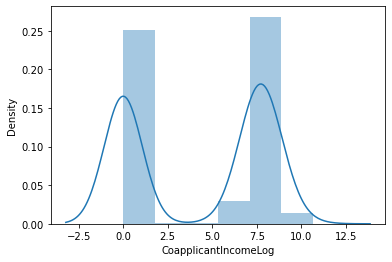

In [25]:
train['CoapplicantIncomeLog'] = np.log(train['CoapplicantIncome']+1)
plt.figure()
sns.distplot(train['CoapplicantIncomeLog'])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

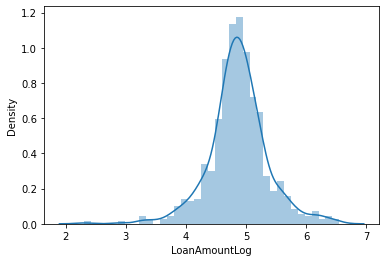

In [26]:
sns.distplot(train['LoanAmountLog'])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

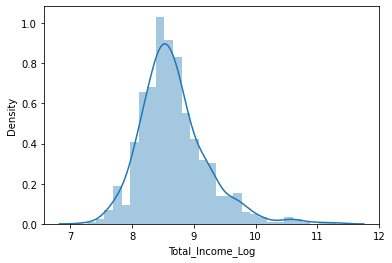

In [27]:
sns.distplot(train['Total_Income_Log'])

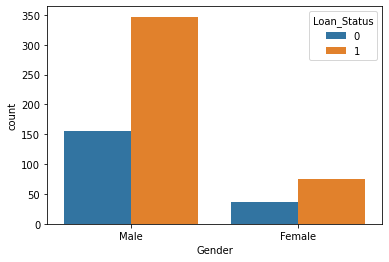

In [28]:
plt.figure()
sns.countplot(x='Gender', data=train, hue='Loan_Status')
plt.show()

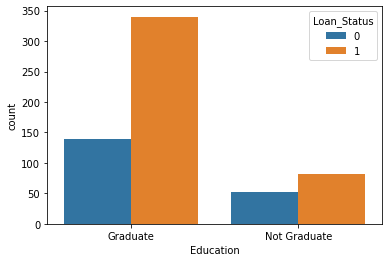

In [29]:
plt.figure()
sns.countplot(x='Education', data=train, hue='Loan_Status')
plt.show()

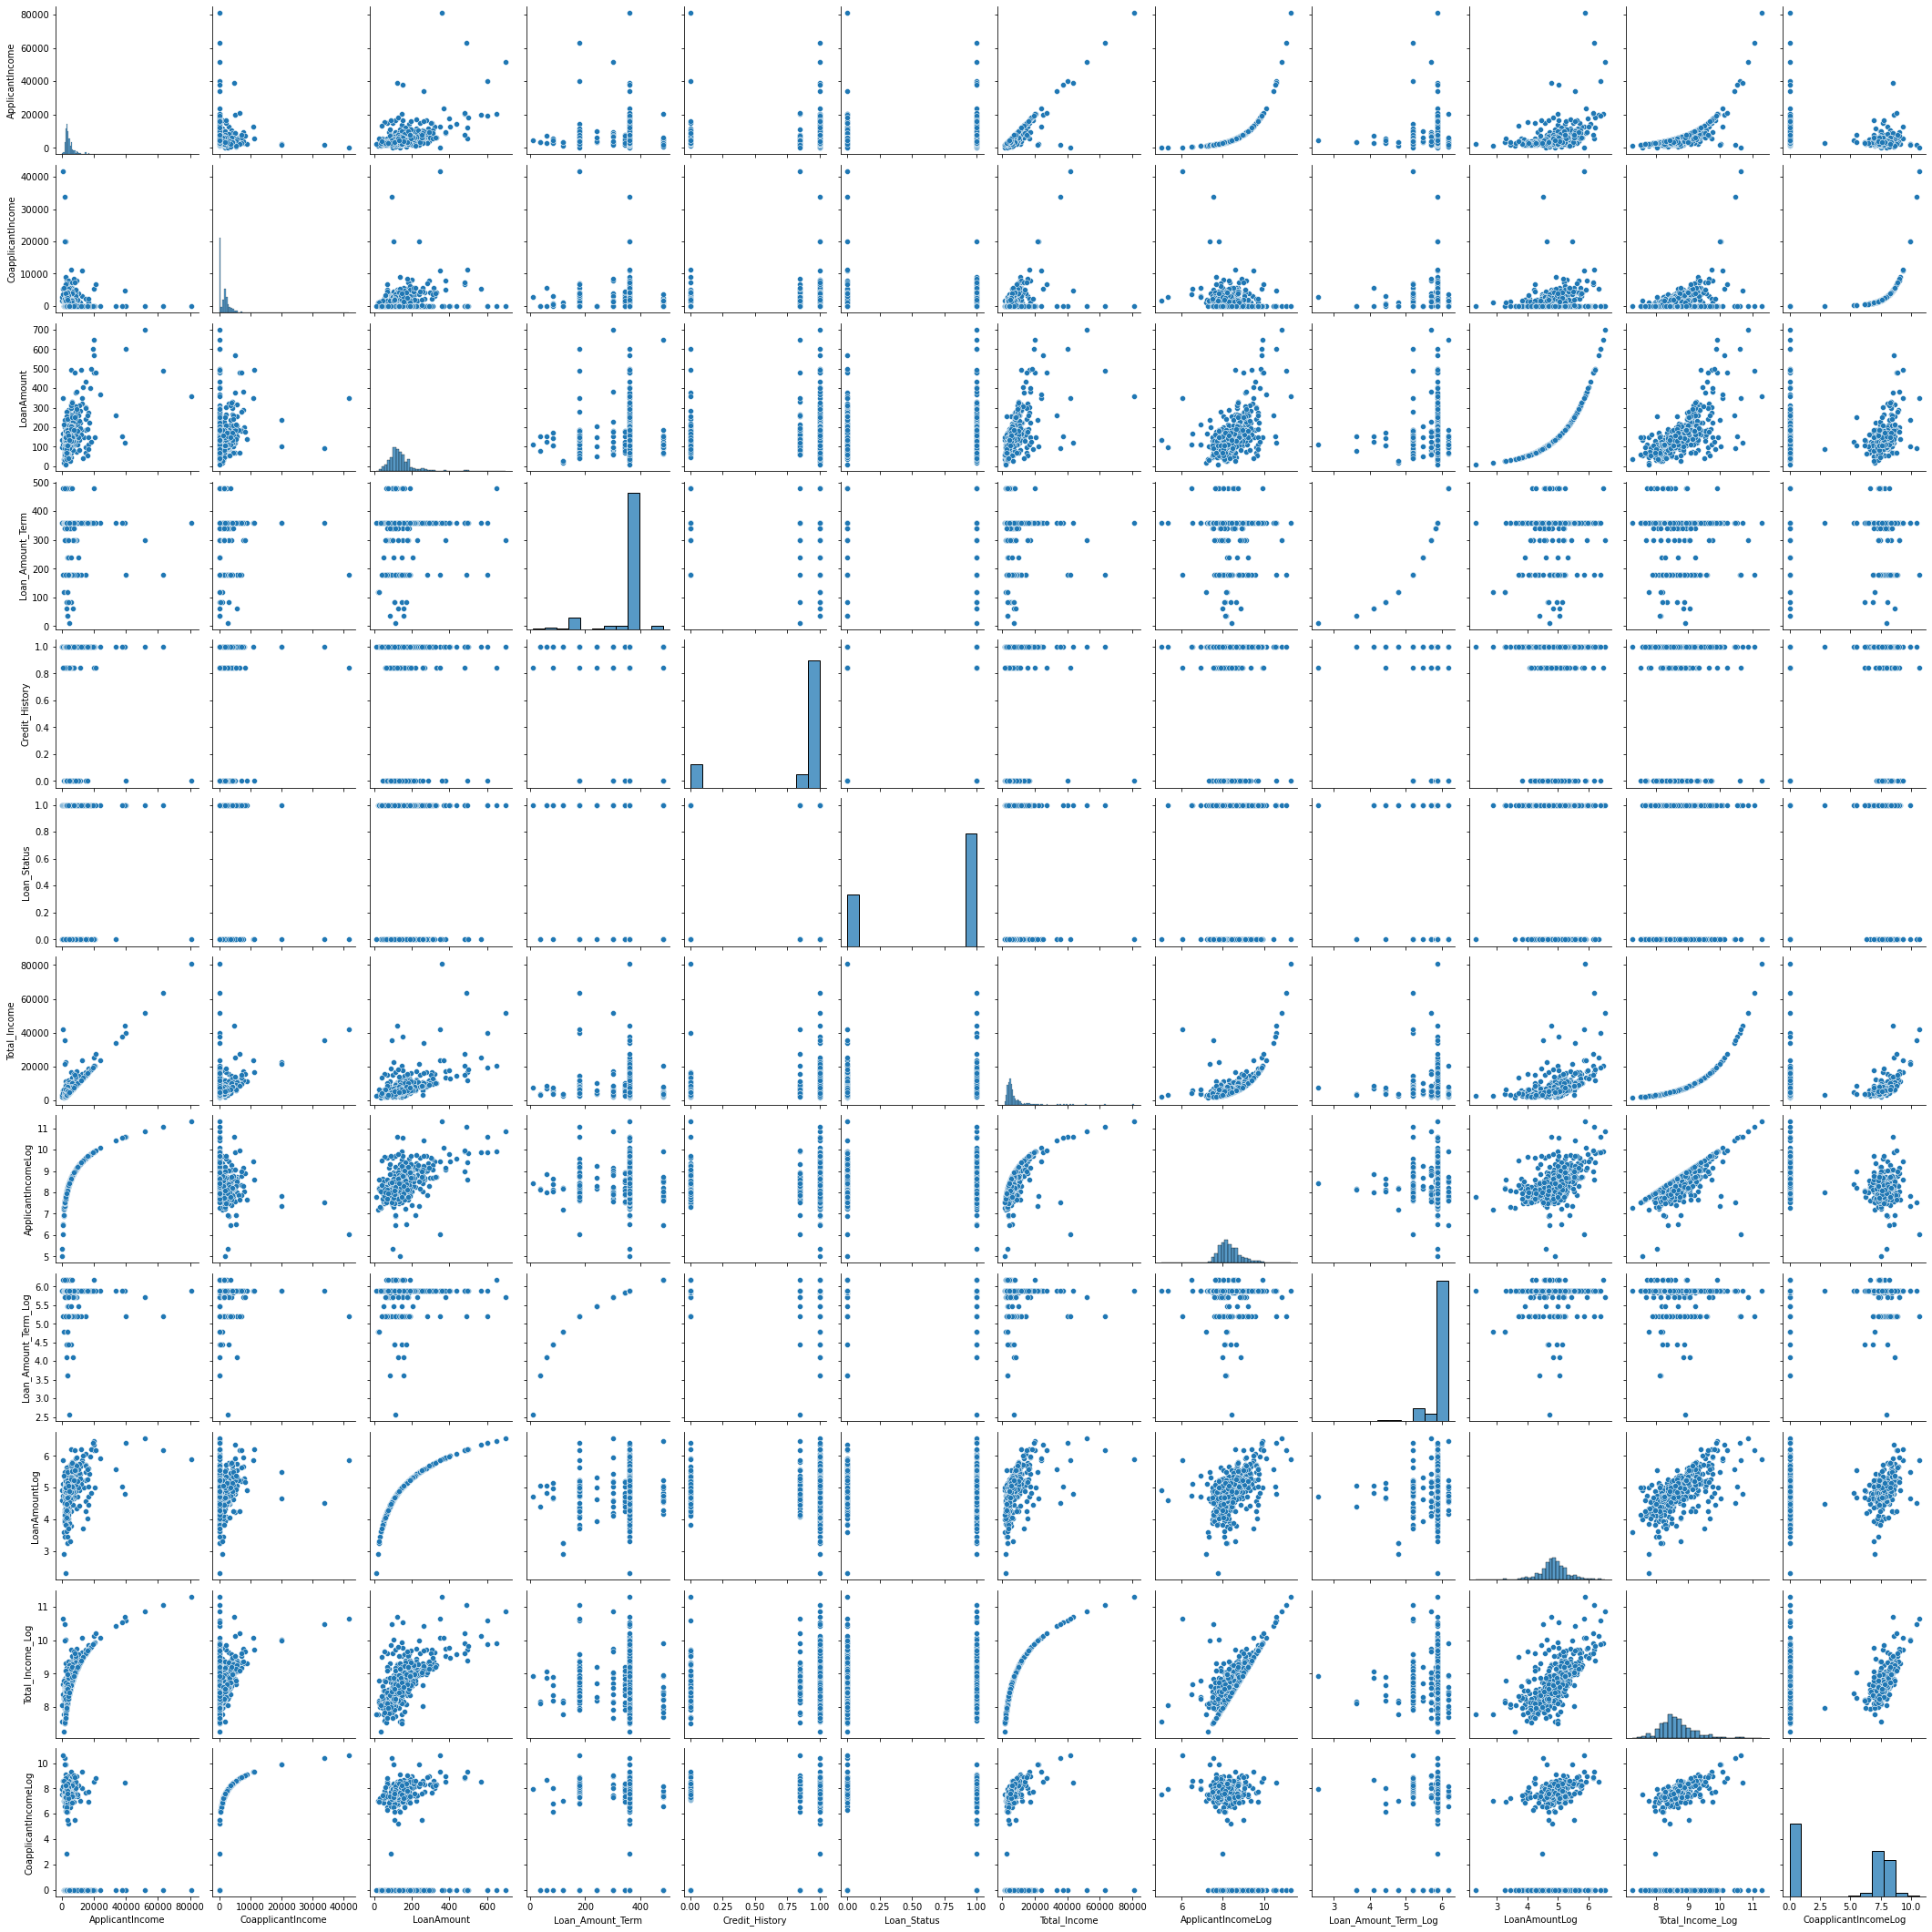

In [30]:
sns.pairplot(train)

<AxesSubplot:>

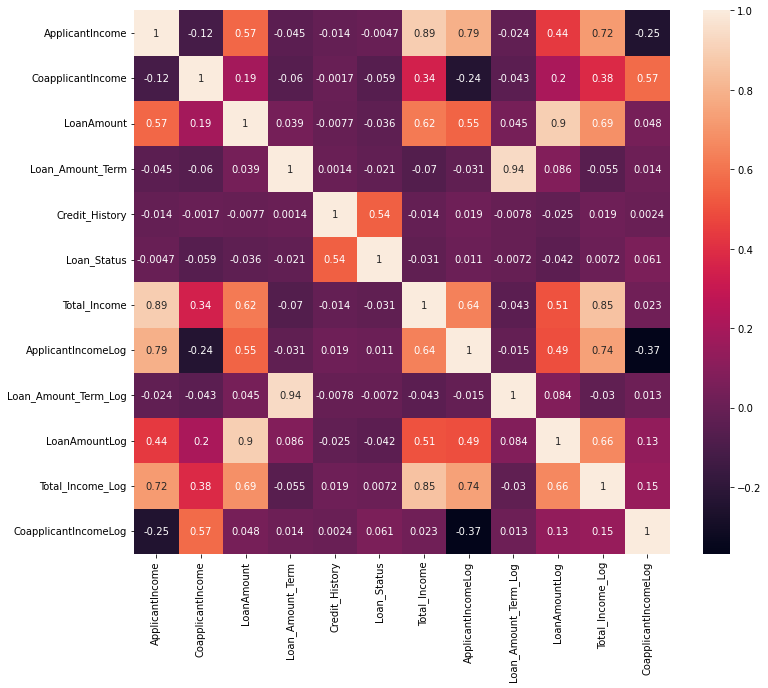

In [31]:
plt.figure(figsize=(12,10))
corr = train.corr()
sns.heatmap(corr, annot=True)

In [32]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'CoapplicantIncomeLog']
train.drop(cols, axis=1, inplace=True)

In [33]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,Loan_Amount_Term_Log,LoanAmountLog,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,1,8.674197,5.888878,4.993232,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,0,8.430327,5.888878,4.859812,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1,8.006701,5.888878,4.204693,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1,7.857094,5.888878,4.795791,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,1,8.699681,5.888878,4.955827,8.699681


In [34]:
train = pd.get_dummies(train, drop_first=True)
train.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,Loan_Amount_Term_Log,LoanAmountLog,Total_Income_Log,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,8.674197,5.888878,4.993232,8.674197,1,0,1,0,0,0,0,0,1
1,1.0,0,8.430327,5.888878,4.859812,8.714732,1,1,0,1,0,0,0,0,0
2,1.0,1,8.006701,5.888878,4.204693,8.006701,1,1,1,0,0,0,1,0,1
3,1.0,1,7.857094,5.888878,4.795791,8.505525,1,1,1,0,0,1,0,0,1
4,1.0,1,8.699681,5.888878,4.955827,8.699681,1,0,1,0,0,0,0,0,1


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Credit_History           614 non-null    float64
 1   Loan_Status              614 non-null    int64  
 2   ApplicantIncomeLog       614 non-null    float64
 3   Loan_Amount_Term_Log     614 non-null    float64
 4   LoanAmountLog            614 non-null    float64
 5   Total_Income_Log         614 non-null    float64
 6   Gender_Male              614 non-null    uint8  
 7   Married_Yes              614 non-null    uint8  
 8   Dependents_0             614 non-null    uint8  
 9   Dependents_1             614 non-null    uint8  
 10  Dependents_2             614 non-null    uint8  
 11  Education_Not Graduate   614 non-null    uint8  
 12  Self_Employed_Yes        614 non-null    uint8  
 13  Property_Area_Semiurban  614 non-null    uint8  
 14  Property_Area_Urban      6

In [36]:
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [38]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

<AxesSubplot:>

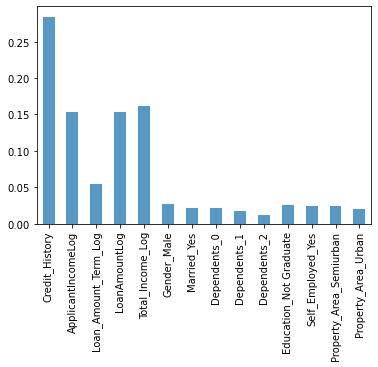

In [39]:
pd.Series(model.feature_importances_, index = X.columns).plot(kind='bar', alpha=0.75, rot=90)

In [40]:
logmodel = LogisticRegression(C=0.23357214690901212, penalty='l1', solver='saga')
logmodel.fit(X_train , y_train)
pred_l = logmodel.predict(X_test)
acc_l = accuracy_score(y_test , pred_l)*100
acc_l

80.0

In [41]:
random_forest = RandomForestClassifier(n_estimators = 120,min_samples_split = 2,min_samples_leaf = 1,max_features= 'auto',max_depth= 5,bootstrap= True)
random_forest.fit(X_train, y_train)
pred_rf = random_forest.predict(X_test)
acc_rf = accuracy_score(y_test , pred_rf)*100
acc_rf

79.45945945945945

In [42]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test , pred_knn)*100
acc_knn

74.5945945945946

In [43]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
pred_gb = gaussian.predict(X_test)
acc_gb = accuracy_score(y_test , pred_gb)*100
acc_gb

79.45945945945945

In [44]:
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)
acc_svm = accuracy_score(y_test , pred_svm)*100
acc_svm

80.0

In [45]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
pred_gbc = gbk.predict(X_test)
acc_gbc = accuracy_score(y_test , pred_gbc)*100
acc_gbc

77.83783783783784

In [46]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forrest','K- Nearest Neighbour' ,
             'Naive Bayes' , 'SVM','Gradient Boosting Classifier'],
    'Score': [acc_l , acc_rf , acc_knn , acc_gb ,acc_svm ,acc_gbc ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,80.000000
4,SVM,80.000000
1,Random Forrest,79.459459
3,Naive Bayes,79.459459
5,Gradient Boosting Classifier,77.837838
2,K- Nearest Neighbour,74.594595


In [47]:
cross_val_score(LogisticRegression(), X, y, cv=5)

array([0.80487805, 0.77235772, 0.7804878 , 0.85365854, 0.81967213])

In [48]:
cross_val_score(GradientBoostingClassifier(), X, y, cv=5)

array([0.7398374 , 0.7398374 , 0.79674797, 0.81300813, 0.80327869])

In [49]:
cross_val_score(RandomForestClassifier(), X, y, cv=5)

array([0.78861789, 0.76422764, 0.78861789, 0.80487805, 0.78688525])

In [50]:
cross_val_score(SVC(), X, y, cv=5)

array([0.69105691, 0.69105691, 0.68292683, 0.68292683, 0.68852459])

In [51]:
param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C':np.logspace(-4, 4, 20),
    'solver': ['lbfgs','newtom-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000, 2500, 5000]
    }
]

In [52]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(logmodel, param_grid, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [53]:
best_model = clf.fit(X, y)

In [54]:
print('Best Parameters:', best_model.best_estimator_)


Best Parameters: LogisticRegression(C=0.23357214690901212, penalty='l1', solver='saga')


In [55]:
best_model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [56]:
best_model.score(X,y)

0.8094462540716613

In [57]:
from sklearn.model_selection import GridSearchCV
cfl = GridSearchCV(logmodel, param_grid, cv=5, verbose=True, n_jobs=-1)

In [58]:
best_cfl = cfl.fit(X,y)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


In [59]:
best_cfl.best_estimator_

LogisticRegression(C=0.03359818286283781, penalty='l1', solver='liblinear')

In [60]:
best_cfl.score(X,y)

0.8094462540716613

In [61]:
params = {
    'n_estimators': [x for x in range(20,150,20)],
    'max_features': ['auto','sqrt'],
    'max_depth': [x for x in range(5,35,5)],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10],
    'bootstrap': [True,False]
}

In [62]:
rf_RandomGrid = RandomizedSearchCV(estimator = random_forest, param_distributions=params, cv=10, verbose=2, n_jobs = 4)

In [63]:
rf_RandomGrid.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(max_depth=5,
                                                    n_estimators=120),
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140]},
                   verbose=2)

In [64]:
rf_RandomGrid.best_params_

{'n_estimators': 140,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15,
 'bootstrap': False}

In [65]:
rf_RandomGrid.score(X,y)

0.8306188925081434

In [66]:
from sklearn.metrics import confusion_matrix
y_pred = logmodel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 23,  35],
       [  2, 125]], dtype=int64)

In [67]:
import pickle
file = open("logis_model", "wb")
pickle.dump(logmodel, file)

In [68]:
file1 = open("rf_model", "wb")
pickle.dump(rf_RandomGrid, file)